<a href="https://colab.research.google.com/github/santisf/datascience_coder/blob/main/clase_3_practica.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
url_path: str = r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTn06Vy8VSrsr5080Gavs75hVDuEWK7oASm3P4LWRYT8sDAc3dPufw4DI9oaHcjVgOjg61phRV8bHG1/pub?output=csv"

df = pd.read_csv(url_path)

df.head()

,ID,Nombre,Edad,Ciudad,Email,Telefono,Fecha_Registro,Producto_Comprado,Monto_Compra
0,1,Ana García,28,Madrid,ana.garcia@email.com,611111111,2024-01-15,Laptop,1200
1,2,Carlos López,35,Barcelona,carlos.lopez@email.com,622222222,2024-01-16,Smartphone,800
2,3,María Rodríguez,42,Valencia,maria.rodriguez@email.com,633333333,2024-01-17,Tablet,450
3,4,Juan Pérez,29,Sevilla,juan.perez@email.com,644444444,2024-01-18,Auriculares,150
4,5,Laura Martínez,31,Málaga,laura.martinez@email.com,655555555,2024-01-19,Monitor,300


---

In [ ]:
ulr_video_games:str = r"https://raw.githubusercontent.com/Andru-1987/csv_files_ds/refs/heads/main/Video_Games.csv"

In [ ]:
df = pd.read_csv(ulr_video_games)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


## Lectura por chunks de un dataset

In [ ]:
chunksize = 1_000

df_final = []

with pd.read_csv(ulr_video_games, chunksize=chunksize) as reader:
    for chunk in reader:
        df_final.append(chunk)

In [ ]:
videojuegos_df= pd.concat(df_final)

In [ ]:
videojuegos_df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
videojuegos_df.Developer.unique()

array(['Nintendo', nan, 'Good Science Studio', ..., 'Big Red Software',
       'Atomic Games', 'Interchannel-Holon'], dtype=object)

In [ ]:
videojuegos_df[videojuegos_df["Developer"] == "Nintendo" ]

In [ ]:
videojuegos_df.loc[ :, "Developer"] == "Nintendo"

## iloc --> indices --> permite traer datos con condiciones?  NO

In [ ]:
# indices

# filas  --> columns
nintendo_df = videojuegos_df.iloc[ 3:9 , 0:3]

In [ ]:
nintendo_df

In [ ]:
nintendo_df

In [ ]:
# loc si! te permite traer por medio de condiciones, y ademas con etiquedas en las columnas

In [ ]:
## Primero las coincidencias --> las columnas!

nintendo_df = videojuegos_df.loc[
    (videojuegos_df["Developer"] == "Nintendo")
    & (videojuegos_df["Year_of_Release"] >= 2010)

    , "Name":"Genre"]

In [ ]:
nintendo_df

In [ ]:
videojuegos_df.query(
    'Developer == "Nintendo" and Year_of_Release >= 2010'
).loc[:,"Name":"Genre"]

## Hands On Lab

In [ ]:
link_google_sheet:str = r"https://docs.google.com/spreadsheets/d/e/2PACX-1vTKhGIpdl4930mXr4Aex1tLXvLWOlyItiiydpq80b3wAfdCsGTcdTP1N_tLju9hm3puWTobSUW_IMI0/pub?gid=0&single=true&output=csv"

In [ ]:
stocks_df = pd.read_csv(link_google_sheet, sep=",", encoding="utf8")

In [ ]:
stocks_df.columns

Index(['formatted_date', 'MCD', 'SBUX', 'GOOG', 'AMZN', 'MSFT', 'JPM', 'BAC',
       'C', 'MAR', 'HLT', 'RCL', 'V', 'MA', 'PYPL'],
      dtype='object')

In [ ]:
stock_names = {
    "MCD": "McDonald's Corporation",
    "SBUX": "Starbucks Corporation",
    "GOOG": "Alphabet Inc. (Google)",
    "AMZN": "Amazon.com, Inc.",
    "MSFT": "Microsoft Corporation",
    "JPM": "JPMorgan Chase & Co.",
    "BAC": "Bank of America Corporation",
    "C": "Citigroup Inc.",
    "MAR": "Marriott International, Inc.",
    "HLT": "Hilton Worldwide Holdings Inc.",
    "RCL": "Royal Caribbean Cruises Ltd.",
    "V": "Visa Inc.",
    "MA": "Mastercard Incorporated",
    "PYPL": "PayPal Holdings, Inc."
}


In [ ]:
stocks_df.rename(columns=stock_names, inplace=True)

In [ ]:
stocks_df.head()

,formatted_date,McDonald's Corporation,Starbucks Corporation,Alphabet Inc. (Google),"Amazon.com, Inc.",Microsoft Corporation,JPMorgan Chase & Co.,Bank of America Corporation,Citigroup Inc.,"Marriott International, Inc.",Hilton Worldwide Holdings Inc.,Royal Caribbean Cruises Ltd.,Visa Inc.,Mastercard Incorporated,"PayPal Holdings, Inc."
0,2016-01-01,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999
1,2016-02-01,100.671043,52.064243,697.770019,552.520019,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999
2,2016-03-01,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998
3,2016-04-01,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000
4,2016-05-01,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001


In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   formatted_date                  71 non-null     object 
 1   McDonald's Corporation          71 non-null     float64
 2   Starbucks Corporation           71 non-null     float64
 3   Alphabet Inc. (Google)          71 non-null     float64
 4   Amazon.com, Inc.                71 non-null     float64
 5   Microsoft Corporation           71 non-null     float64
 6   JPMorgan Chase & Co.            71 non-null     float64
 7   Bank of America Corporation     71 non-null     float64
 8   Citigroup Inc.                  71 non-null     float64
 9   Marriott International, Inc.    71 non-null     float64
 10  Hilton Worldwide Holdings Inc.  71 non-null     float64
 11  Royal Caribbean Cruises Ltd.    71 non-null     float64
 12  Visa Inc.                       71 non

In [ ]:
stocks_df["dates"] = pd.to_datetime(stocks_df["formatted_date"])

In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   formatted_date                  71 non-null     object        
 1   McDonald's Corporation          71 non-null     float64       
 2   Starbucks Corporation           71 non-null     float64       
 3   Alphabet Inc. (Google)          71 non-null     float64       
 4   Amazon.com, Inc.                71 non-null     float64       
 5   Microsoft Corporation           71 non-null     float64       
 6   JPMorgan Chase & Co.            71 non-null     float64       
 7   Bank of America Corporation     71 non-null     float64       
 8   Citigroup Inc.                  71 non-null     float64       
 9   Marriott International, Inc.    71 non-null     float64       
 10  Hilton Worldwide Holdings Inc.  71 non-null     float64       
 11  Royal Ca

In [ ]:
stocks_df.drop(columns=["formatted_date"], inplace=True)

In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   McDonald's Corporation          71 non-null     float64       
 1   Starbucks Corporation           71 non-null     float64       
 2   Alphabet Inc. (Google)          71 non-null     float64       
 3   Amazon.com, Inc.                71 non-null     float64       
 4   Microsoft Corporation           71 non-null     float64       
 5   JPMorgan Chase & Co.            71 non-null     float64       
 6   Bank of America Corporation     71 non-null     float64       
 7   Citigroup Inc.                  71 non-null     float64       
 8   Marriott International, Inc.    71 non-null     float64       
 9   Hilton Worldwide Holdings Inc.  71 non-null     float64       
 10  Royal Caribbean Cruises Ltd.    71 non-null     float64       
 11  Visa Inc

In [ ]:
stocks_df.head()

,McDonald's Corporation,Starbucks Corporation,Alphabet Inc. (Google),"Amazon.com, Inc.",Microsoft Corporation,JPMorgan Chase & Co.,Bank of America Corporation,Citigroup Inc.,"Marriott International, Inc.",Hilton Worldwide Holdings Inc.,Royal Caribbean Cruises Ltd.,Visa Inc.,Mastercard Incorporated,"PayPal Holdings, Inc.",dates
0,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999,2016-01-01
1,100.671043,52.064243,697.770019,552.520019,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999,2016-02-01
2,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998,2016-03-01
3,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000,2016-04-01
4,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001,2016-05-01


In [ ]:
stocks_df.set_index('dates', inplace=True)

In [ ]:
stocks_df.head()

,McDonald's Corporation,Starbucks Corporation,Alphabet Inc. (Google),"Amazon.com, Inc.",Microsoft Corporation,JPMorgan Chase & Co.,Bank of America Corporation,Citigroup Inc.,"Marriott International, Inc.",Hilton Worldwide Holdings Inc.,Royal Caribbean Cruises Ltd.,Visa Inc.,Mastercard Incorporated,"PayPal Holdings, Inc."
dates,,,,,,,,,,,,,,
2016-01-01,106.332146,54.353962,742.950012,587.000000,49.853489,50.424938,12.573010,36.897804,57.754189,35.192841,74.235298,71.574371,85.822624,36.139999
2016-02-01,100.671043,52.064243,697.770019,552.520019,46.043667,48.033066,11.132540,33.707108,64.228912,41.061607,67.360649,69.556580,83.956566,38.139999
2016-03-01,108.782211,53.571442,744.950012,593.640015,50.339031,50.524323,12.021718,36.223217,67.336624,44.499886,74.790009,73.631477,91.278160,38.599998
2016-04-01,109.483307,50.457645,693.010010,659.590027,45.453705,53.919910,12.995729,40.153545,66.305466,43.716049,70.465584,74.363144,93.683258,39.180000
2016-05-01,105.648926,49.255203,735.719971,722.789978,48.306515,56.098225,13.201019,40.447887,62.474155,41.198154,70.456474,75.999847,92.817329,37.790001


In [ ]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 71 entries, 2016-01-01 to 2021-11-01
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   McDonald's Corporation          71 non-null     float64
 1   Starbucks Corporation           71 non-null     float64
 2   Alphabet Inc. (Google)          71 non-null     float64
 3   Amazon.com, Inc.                71 non-null     float64
 4   Microsoft Corporation           71 non-null     float64
 5   JPMorgan Chase & Co.            71 non-null     float64
 6   Bank of America Corporation     71 non-null     float64
 7   Citigroup Inc.                  71 non-null     float64
 8   Marriott International, Inc.    71 non-null     float64
 9   Hilton Worldwide Holdings Inc.  71 non-null     float64
 10  Royal Caribbean Cruises Ltd.    71 non-null     float64
 11  Visa Inc.                       71 non-null     float64
 12  Mastercard Incorpo

## Graficar data

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'teal']

In [ ]:
columnas_seleccionas:list[str] = ["McDonald's Corporation", "Amazon.com, Inc." ]
columnas_seleccionas:list[str] = stocks_df.columns

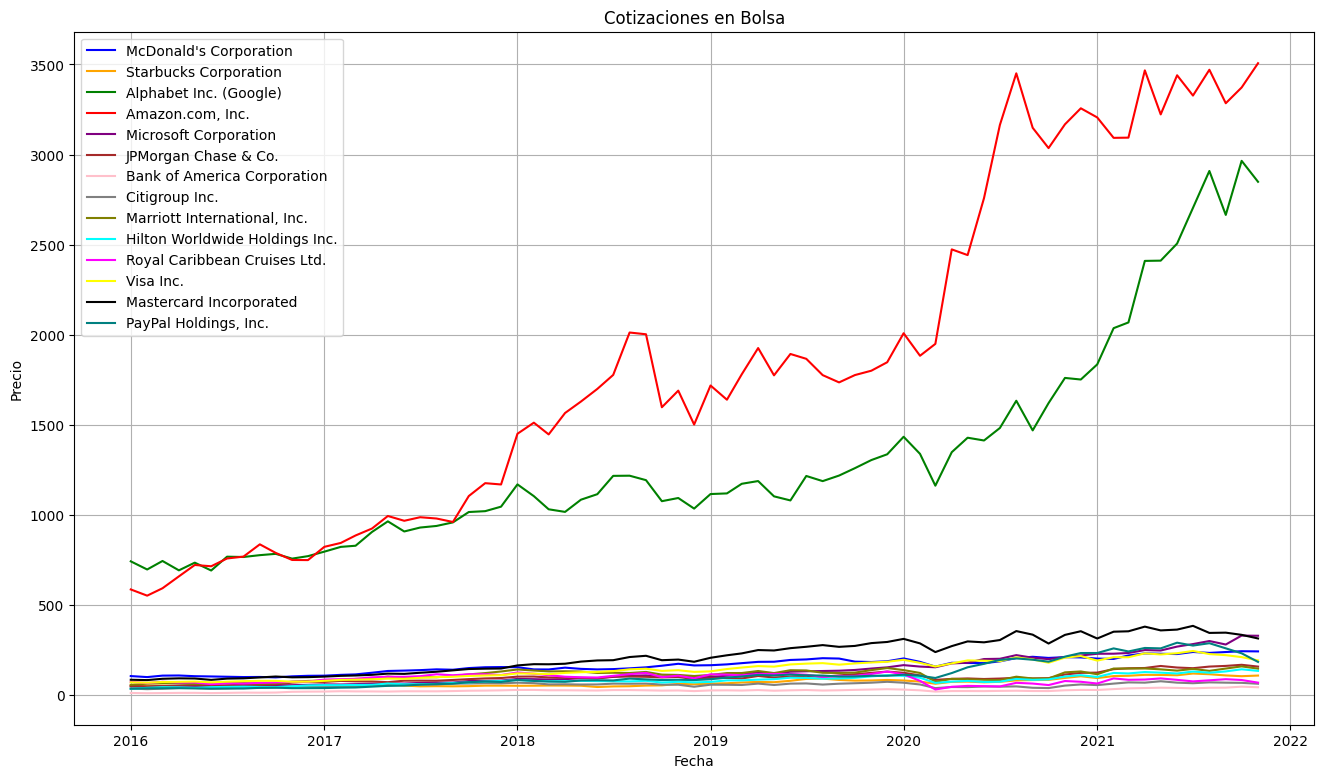

In [ ]:
# el seteo de la imagen general -> canvas --> lienzo
plt.figure(figsize=(16,9)) # 16/10
plt.gca().set_prop_cycle(color=colors)

# capas individuadles
for column in columnas_seleccionas:
    plt.plot(
        stocks_df.index,
        stocks_df[column],
        label = column
        )

# Set grafica viz general
plt.title("Cotizaciones en Bolsa")
plt.xlabel("Fecha")
plt.ylabel("Precio")


plt.legend()
plt.grid(True)
plt.show()

## Micro challenge
- Hacer un grafico de lineas para los siguientes:
    > * EU_Sales
    > * JP_Sales
    > * Other_Sales

Teniendo en cuenta el axis `Year_of_Release` y por `Developer`

In [ ]:
import pandas as pd
import numpy as np

ulr_video_games:str = r"https://raw.githubusercontent.com/Andru-1987/csv_files_ds/refs/heads/main/Video_Games.csv"
videojuegos_df=pd.read_csv(ulr_video_games)

import matplotlib.pyplot as plt
colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan', 'magenta', 'yellow', 'black', 'teal']

# el seteo de la imagen general -> canvas --> lienzo
plt.figure(figsize=(16,9)) # 16/10
plt.gca().set_prop_cycle(color=colors)


# Set grafica viz general
plt.title("Cotizaciones en Bolsa")
plt.xlabel("Fecha")
plt.ylabel("Precio")

plt.legend()
plt.grid(True)
plt.show()